In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Exercise 4.1: Histogram and PDF of Complex Gaussian Noise

In [2]:
np.random.seed(0)
number_samples = 10000
std = 1.5

real = std * np.random.randn(number_samples)
imag_dist = std * np.random.randn(number_samples)
noise = real.astype('csingle')
noise.imag = imag_dist
# or use: z = std*np.random.randn(number_samples, 2).view(np.complex128).flatten()


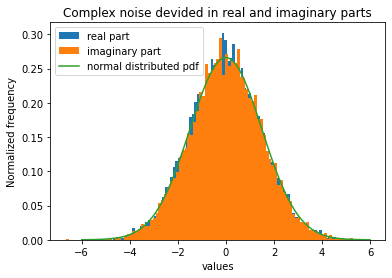

In [3]:
bins = int(np.sqrt(number_samples))
xx = np.linspace(-6, 6, 200)

plt.figure()
plt.hist(noise.real, bins=bins, label='real part',density=True) # density=True normalizes the bin heights
# from total to relative value
plt.hist(noise.imag, bins=bins, label='imaginary part',density=True)
plt.plot(xx, st.norm.pdf(xx, 0, std), label='normal distributed pdf')
plt.title('Complex noise devided in real and imaginary parts')
plt.xlabel('values')
plt.ylabel('Normalized frequency')
plt.legend()
plt.show()

## Exercise 4.2: Rayleigh Distribution

In [4]:
magnitude_noise = np.abs(noise)

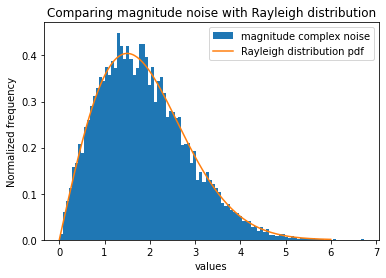

In [5]:
xx_r = np.linspace(0, 6, 200)

plt.figure()
plt.hist(magnitude_noise, bins=bins, label='magnitude complex noise',density=True)
plt.plot(xx_r, st.rayleigh.pdf(xx_r,scale=std), label='Rayleigh distribution pdf')
plt.title('Comparing magnitude noise with Rayleigh distribution')
plt.xlabel('values')
plt.ylabel('Normalized frequency')
plt.legend()
plt.show()

It becomes clear that the magnitude of a complex normal distributed noise comes close to a Rayleigh distribution, meaning that most magnitude values of the noise are small which makes sense for a normal distributed signal.

## Exercise 4.3: Rice Distribution

In [6]:
A = 8
s = A + noise # only the real values change for the noise array 
magnitude_s = np.abs(s)

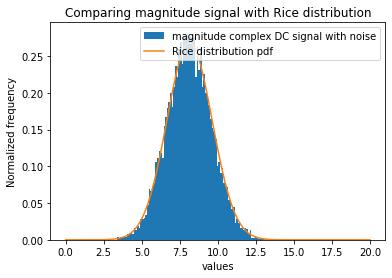

In [7]:
xx_ri = np.linspace(0, 20, 200)

plt.figure()
plt.hist(magnitude_s, bins=bins, label='magnitude complex DC signal with noise',density=True)
plt.plot(xx_ri, st.rice.pdf(xx_ri, A/std, scale=std), label='Rice distribution pdf')
plt.title('Comparing magnitude signal with Rice distribution')
plt.xlabel('values')
plt.ylabel('Normalized frequency')
plt.legend()
plt.show()

Highest histogram bin for a signal with DC level of 8 has its value around 8. No surprise. Through the DC value the magnitudes are higher and come close to a Rice distribution.

## Homework 4.1: Probability of Detection: DC in Noise

In [8]:
st.rice.pdf(33, A/std, scale=std)

2.5960759991416433e-61

In [9]:
signal_s = A + noise
ss=st.rice.sf(abs(signal_s), A/std, scale=std)
np.mean(ss)

0.5062055091247898

In [10]:
ray_val = sum(st.rayleigh.sf(abs(noise),scale=std))
signal_s.std()

2.1007636

In [20]:
z = 1.5*np.random.randn(10000, 2).view(np.complex128).flatten()

def dc_in_noise(threshold_VT_factor=1, n=z):
    detection_coll = []
    false_alarm_coll = []
    SNR_coll = []
    rice_coll =[]
    ray_coll=[]

    for A in np.linspace(0.1,15):
        std = 1.5
        
        signal_s = A + n

        SNR = 10*np.log10(A**2/(2*std**2))
        SNR_coll.append(SNR)
        threshold_VT = A * threshold_VT_factor

        detection_mask = abs(signal_s)>threshold_VT
        number_detections = len(np.where(detection_mask==True)[0])/number_samples
        detection_coll.append(number_detections)

        false_alarm_mask = abs(noise)>threshold_VT
        number_false_alarms = len(np.where(false_alarm_mask==True)[0])/number_samples
        false_alarm_coll.append(number_false_alarms)
        

        rice_val = sum(st.rice.pdf(abs(signal_s), A*threshold_VT/std, scale=std))
        rice_coll.append(rice_val)
        

        ray_val = sum(st.rayleigh.pdf(abs(signal_s),scale=std))
        ray_coll.append(ray_val)

    plt.figure()
    plt.plot(SNR_coll,detection_coll, label='detection')
    plt.plot(SNR_coll,false_alarm_coll, label='false alarm')
    
    plt.plot(SNR_coll,rice_coll/max(rice_coll), label='Rice', marker='+',ls='')
    plt.plot(SNR_coll,ray_coll/max(ray_coll), label='Rayleigh', marker='+',ls='')

    plt.title(f'Normalized number of detections and false alarms for a normal-noised signal with different DC values given a threshold=DC-value*{threshold_VT_factor}')
    plt.xlabel('SNR in dB (implying increasing DC-values of signal)')
    plt.ylabel('normalized number')
    plt.legend()
    plt.show()   
    return SNR_coll,false_alarm_coll,detection_coll

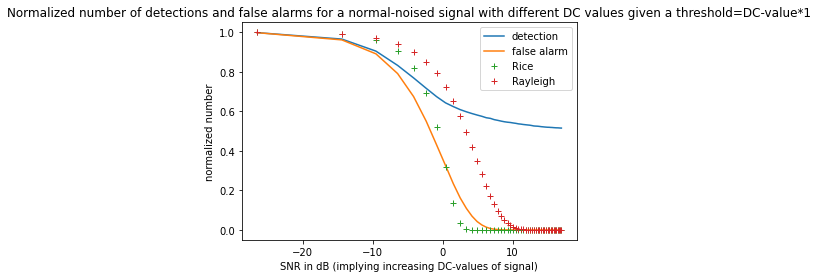

([-26.532125137753436,
  -14.402742933093089,
  -9.529457242506236,
  -6.4264132085197625,
  -4.144852445618355,
  -2.3396366897817855,
  -0.8458128835771429,
  0.42840602905065817,
  1.5393888916508862,
  2.5242492667581913,
  3.408725658305864,
  4.211402107469015,
  4.946136387792456,
  5.623538144863536,
  6.2519108488971415,
  6.837875253152497,
  7.3867954402926586,
  7.903078020284319,
  8.390387264470956,
  8.851803016860906,
  9.289938728333404,
  9.707031119103505,
  10.105009279052739,
  10.485548617208867,
  10.850113479816539,
  11.19999117825454,
  11.536319424267008,
  11.860108648250334,
  12.172260304764453,
  12.473582001084726,
  12.764800088300323,
  13.04657020914294,
  13.319486187964971,
  13.584087566047199,
  13.840866022639869,
  14.090270873794271,
  14.332713803497516,
  14.568572952239105,
  14.798196464971722,
  15.021905582038102,
  15.239997341941063,
  15.452746953019876,
  15.660409881542686,
  15.863223695956567,
  16.06140970068721,
  16.255174387664

In [21]:
dc_in_noise()

The Rice distribution told us that we get the highest values where the DC-level value is the case. Here the normalized number of detections lays around 0.5... . So we get a stable detection number for different DC values because the ratio of |s|=|A+n|>VT keeps always the same through the reused n and the updated VT which is always A.<br>
The Rayleigh distribution shows that the noise values are in most cases small. You can observe this phenomena by looking at the false alarm curve. At beginning it is very high because the DC value A is small there such that the noise has a higher impact. However, when A increases a bit the false alarm curve goes rapidly down to 0 as the noise with its small values doesn't have such an high impact on detection anymore.

## Homwork 4.2: Probability of Detection: DC in Noise

### VT=0.5A

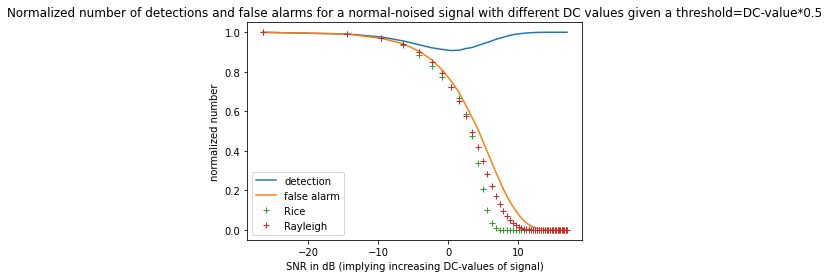

([-26.532125137753436,
  -14.402742933093089,
  -9.529457242506236,
  -6.4264132085197625,
  -4.144852445618355,
  -2.3396366897817855,
  -0.8458128835771429,
  0.42840602905065817,
  1.5393888916508862,
  2.5242492667581913,
  3.408725658305864,
  4.211402107469015,
  4.946136387792456,
  5.623538144863536,
  6.2519108488971415,
  6.837875253152497,
  7.3867954402926586,
  7.903078020284319,
  8.390387264470956,
  8.851803016860906,
  9.289938728333404,
  9.707031119103505,
  10.105009279052739,
  10.485548617208867,
  10.850113479816539,
  11.19999117825454,
  11.536319424267008,
  11.860108648250334,
  12.172260304764453,
  12.473582001084726,
  12.764800088300323,
  13.04657020914294,
  13.319486187964971,
  13.584087566047199,
  13.840866022639869,
  14.090270873794271,
  14.332713803497516,
  14.568572952239105,
  14.798196464971722,
  15.021905582038102,
  15.239997341941063,
  15.452746953019876,
  15.660409881542686,
  15.863223695956567,
  16.06140970068721,
  16.255174387664

In [22]:
dc_in_noise(threshold_VT_factor=0.5)

With a lower threshold the it is much easier for the signal to accept its noise such that the we will have much more detections. (Here, with start of certain SNR value we detect all elements of the signal and not only parts of it). <br>
Furthermore, the false alarms are increased in the beginning because the noise has to be now only half as big as before to fulfill the false alarm condition. However, reaching a certain DC-value the noise is still too small to fulfill the condition further.

### VT=2A

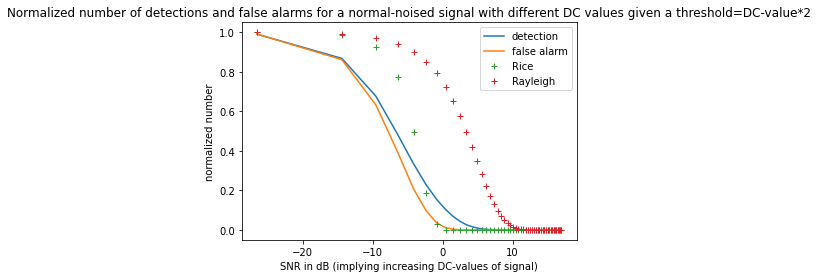

([-26.532125137753436,
  -14.402742933093089,
  -9.529457242506236,
  -6.4264132085197625,
  -4.144852445618355,
  -2.3396366897817855,
  -0.8458128835771429,
  0.42840602905065817,
  1.5393888916508862,
  2.5242492667581913,
  3.408725658305864,
  4.211402107469015,
  4.946136387792456,
  5.623538144863536,
  6.2519108488971415,
  6.837875253152497,
  7.3867954402926586,
  7.903078020284319,
  8.390387264470956,
  8.851803016860906,
  9.289938728333404,
  9.707031119103505,
  10.105009279052739,
  10.485548617208867,
  10.850113479816539,
  11.19999117825454,
  11.536319424267008,
  11.860108648250334,
  12.172260304764453,
  12.473582001084726,
  12.764800088300323,
  13.04657020914294,
  13.319486187964971,
  13.584087566047199,
  13.840866022639869,
  14.090270873794271,
  14.332713803497516,
  14.568572952239105,
  14.798196464971722,
  15.021905582038102,
  15.239997341941063,
  15.452746953019876,
  15.660409881542686,
  15.863223695956567,
  16.06140970068721,
  16.255174387664

In [23]:
dc_in_noise(threshold_VT_factor=2)

The threshold is set higher here. For detection condition accounts |s|=|A+n|>2*A. It becomse clear that for positive DC-values (and they are all in this example) the noise should be even bigger than A such that the condition would be fulfilled and detection takes place. However, the noise values are small because gaussian with 0 mean and std=1.5. Therefore, detection can only take place for very small DC-values as you can see in the graphic. <br>
As stated above with small noise and higher DC values which get doubled in value the false alarm condition has no change of getting fulfilled.